Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [1]:
# ! pip install -q kaggle

In [2]:
# from google.colab import files
# files.upload()

In [3]:
# ! mkdir ~/.kaggle

In [4]:
# ! cp kaggle.json ~/.kaggle/

In [5]:
# ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# !kaggle datasets download -d alxmamaev/flowers-recognition

In [7]:
# !mkdir flowers-recognition

In [8]:
# ! unzip flowers-recognition.zip -d flowers-recognition

In [9]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 

In [10]:
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


In [11]:
#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

In [12]:
# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [13]:
X=[]  # /content/Flowers Recognition/flowers/flowers
Z=[]
IMG_SIZE=240
NUMBER_OF_IMAGES_YOU_WANTS_TO_USE = 700
FLOWER_DAISY_DIR='/content/flowers-recognition/flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/flowers-recognition/flowers/sunflower'
FLOWER_TULIP_DIR='/content/flowers-recognition/flowers/tulip'
FLOWER_DANDI_DIR='/content/flowers-recognition/flowers/dandelion'
FLOWER_ROSE_DIR='/content/flowers-recognition/flowers/rose'

In [14]:
def assign_label(img,flower_type):
    return flower_type
    

In [15]:
def make_train_data(flower_type,DIR):
    num = 0
    for img in tqdm(os.listdir(DIR)):
        num = num + 1
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        substring = ".py"
        if substring not in path and num < NUMBER_OF_IMAGES_YOU_WANTS_TO_USE+1:
          img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))        
          X.append(np.array(img))
          Z.append(str(label))
        else:
          # print()
          num = num

        
        
 

In [16]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 769/769 [00:01<00:00, 395.77it/s]

700


In [17]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 734/734 [00:02<00:00, 314.07it/s]

1400


In [18]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:02<00:00, 361.34it/s]

2100


In [19]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 1055/1055 [00:02<00:00, 375.39it/s]

2798


In [20]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:02<00:00, 371.91it/s]

3498


In [21]:
# fig,ax=plt.subplots(5,2)
# fig.set_size_inches(15,15)
# for i in range(5):
#     for j in range (2):
#         l=rn.randint(0,len(Z))
#         ax[i,j].imshow(X[l])
#         ax[i,j].set_title('Flower: '+Z[l])
        
# plt.tight_layout()

In [22]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [23]:
# x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [24]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.40,random_state=42)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=42)
# X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.40)
X = 0
Y = 0

In [26]:
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

In [27]:
X_train = X_train.reshape((X_train.shape[0], IMG_SIZE*IMG_SIZE*3))
X_test = X_test.reshape((X_test.shape[0], IMG_SIZE*IMG_SIZE*3))
# X_validation = X_validation.reshape((X_validation.shape[0], IMG_SIZE*IMG_SIZE*3))

In [28]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [29]:
# print(X_train.shape)
# print(y_train.shape)         NUMBER_OF_IMAGES_YOU_WANTS_TO_USE
# print(X_test.shape)
# print(y_test.shape)

In [42]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(IMG_SIZE*IMG_SIZE*3,)))
model.add(Dense(25, activation='relu'))
# model.add(Dense(8, activation='relu'))
model.add(Dense(5,activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [43]:
# history = model.fit(X_train, y_train, epochs=50, verbose=1, batch_size=512, validation_data=(X_validation, y_validation))
history = model.fit(X_train, y_train, epochs=25, verbose=1, batch_size=512)

Epoch 1/25
5/5 [==============================] - 2s 158ms/step - loss: 12.6195 - accuracy: 0.2131
Epoch 2/25
5/5 [==============================] - 1s 184ms/step - loss: 14.3210 - accuracy: 0.2355
Epoch 3/25
5/5 [==============================] - 1s 159ms/step - loss: 9.7022 - accuracy: 0.2441
Epoch 4/25
5/5 [==============================] - 1s 140ms/step - loss: 7.3674 - accuracy: 0.2328
Epoch 5/25
5/5 [==============================] - 1s 137ms/step - loss: 4.7185 - accuracy: 0.3354
Epoch 6/25
5/5 [==============================] - 1s 175ms/step - loss: 2.9560 - accuracy: 0.3384
Epoch 7/25
5/5 [==============================] - 1s 152ms/step - loss: 2.4712 - accuracy: 0.4056
Epoch 8/25
5/5 [==============================] - 1s 171ms/step - loss: 2.0958 - accuracy: 0.4014
Epoch 9/25
5/5 [==============================] - 1s 184ms/step - loss: 1.6920 - accuracy: 0.4535
Epoch 10/25
5/5 [==============================] - 1s 139ms/step - loss: 1.5412 - accuracy: 0.4665
Epoch 11/25
5/5 [

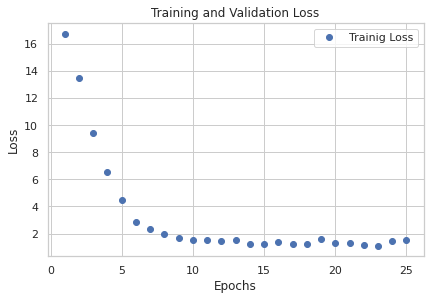

In [44]:
loss = history.history["loss"]
# val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "bo", label="Trainig Loss")
# plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.legend(loc='best')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

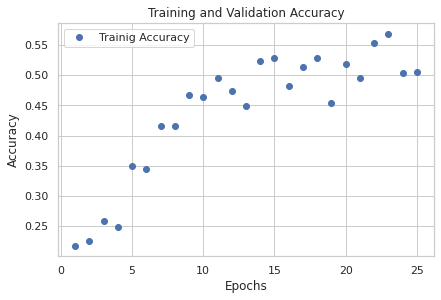

In [45]:
accuracy = history.history["accuracy"]
# val_accuracy = history.history["val_accuracy"]
epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, "bo", label="Trainig Accuracy")
# plt.plot(epochs, val_accuracy, "b", label="Validation Accuracy")
plt.legend(loc='best')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [34]:
# y_pred = model.predict(X_test)

In [35]:
# predict_class = np.argmax(model.predict(X_test), axis=-1)
# accuracy = accuracy_score(y_test, predict_class)
# print(accuracy)

In [36]:
# res = model.evaluate(X_test, y_test)
# print(res)   
# print(model.metrics_names)

In [46]:
res = model.evaluate(X_test, y_test)
print(res)   
print(model.metrics_names)

33/33 [==============================] - 1s 12ms/step - loss: 1.7920 - accuracy: 0.4467
[1.7919570207595825, 0.4466666579246521]
['loss', 'accuracy']
